# INTRODUCTION
* EDA: 尝试预测学生的G3成绩与一周饮酒量之间的关系。
* 与学生饮酒量相关的期末考试成绩
* 学生根据酒精摄入量以平均成绩评分
* 酒精消耗：1次非常低，而10次非常高,普遍在2次到10次

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
data = pd.read_csv('datasets_251_561_student-mat.csv')

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

- School：就读学校，GP-Gabriel Pereira ,MS - Mousinho da Silveira
- Sex: 性别，F-女生，M-男生
- age: 年龄，从15-22
- address:家庭地址，分为U-城市与R-农村
- famsize: 家庭人口,LE3-不超过3人，GT3-超过3人
- Pstatus: 父母的状态，A-分居还是T-一起生活
- Medu: 母亲的受教育程度，0-没有受过教育，1-低等教育，4-高等教育
- Fedu: 父亲的受教育程度，0-没有受过教育，1-低等教育，4-高等教育
- Mjob：母亲的工作，老师, 健康管理员, 城市服务者（警察或政府人员）、待在家里 or 'other'
- Fjob：父亲的工作，老师, 健康管理员, 城市服务者（警察或政府人员）、待在家里 or 'other'
- reason: 选择这个学校的原因，home-离家近，reputation-学校名誉，course-课程原因
- guardian: 学生监护人，mother-母亲，father-父亲，other-其他人
- traveltime: 上学的用时，1(<15 min.), 2(15 to 30 min.), 3(30 min. to 1 hour), 4(1 hour)
- studytime: 一周学习的时长, 1(<2 hours),2(2 to 5 hours), 3(5 to 10 hours), 4 (<10 hours)
- failures: 班级上一些不愉快的事情发生的次数,0-最少，3-最多
- schoolsup: 额外的高费用教育支出，比如开培训班，yes-是，no-否
- famsup: 额外的家庭教育支出，比如父母经常陪家里的孩子，yes-是，no-否
- paid：是否给孩子开设收费的自费课程，yes-是，no-否
- activities：学生的课外活动是否足够多，yes-是，no-否
- nursery：学校是不是有专门的学生保健医师，yes-是，no-否
- higher：学生是否想要去接受更高的教育，yes-是，no-否
- internet： 在家一周是否上网，yes-是，no-否
- romantic： 是否谈恋爱，yes-是，no-否
- famrel：家庭质量，1-非常差，5-非常好
- freetime：在放学后的课余时间，1-非常短，5-非常长
- goout：经常与朋友出去玩，1-非常少，5非常多
- Dalc：工作日饮酒次数，1 - 非常少 to 5 - 非常多
- Walc： 周末饮酒次数，1 - 非常少 to 5 - 非常多
- health： 健康状况，1 - 非常坏 to 5 - 非常好
- absences：缺勤率，0-0%，93-93%
- G1: 分数1，0 to 20
- G2：分数2, 0 to 20
- G3：分数3（本文主要用的是这个分数）,0 to 20

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


**各个属性之间的相关性**

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

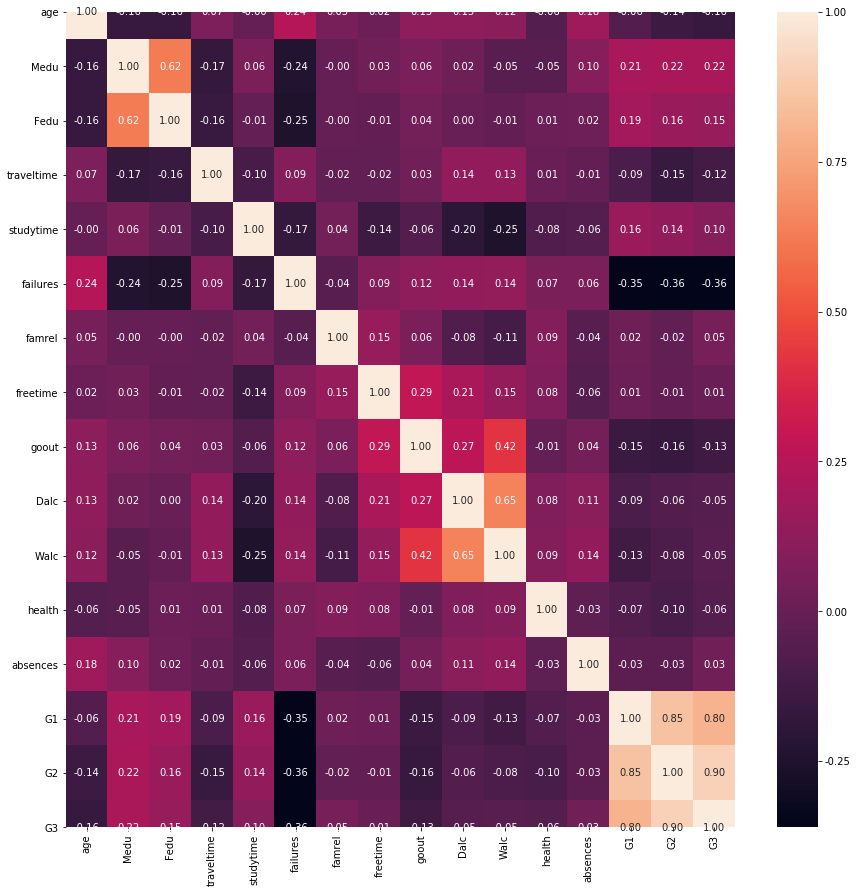

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

- 从相关图可以看出，只有考试成绩与其他的属性高度相关。

**首先，让我们看一下学生的性别。 计算男孩和女孩的数量。**

Text(0.5, 1, 'Gender of students : F - female,M - male')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


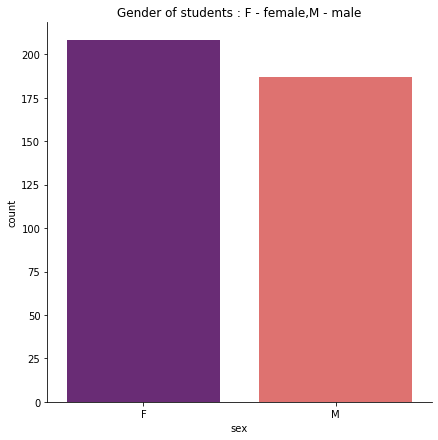

In [7]:
sns.catplot(x="sex", kind="count",palette="magma", data=data, height = 6)
plt.title("Gender of students : F - female,M - male")

- 女孩的数量多一点。


**现在让我们关注学生的年龄**
- 我们假设，学生越年轻，他喝酒的可能性就越小。

In [8]:
ages = data["age"].value_counts()
labels = (np.array(ages.index))
sizes = (np.array((ages / ages.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")

- 15-18岁的学生抽样概率比较大
- 通常是一个最年轻的时代。 青少年希望与朋友多放松身心，少学习

**学习时长的分布情况**

In [9]:
data['st_time'] = np.nan
df = [data]

for col in df:
    col.loc[col['studytime'] == 1 , 'st_time'] = '< 2 hours'
    col.loc[col['studytime'] == 2 , 'st_time'] = '2 to 5 hours'
    col.loc[col['studytime'] == 3, 'st_time'] = '5 to 10 hours'
    col.loc[col['studytime'] == 4, 'st_time'] = '> 10 hours'  
 
labels = data["st_time"].unique().tolist()
amount = data["st_time"].value_counts().tolist()

colors = ["pink", "cyan", "green", "yellow"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
dt = [trace]
layout = go.Layout(title="Study time")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename='pie')

- 大多数学生每周花2到5到5到10个小时来学习。
- 如果我们为每个学生提供确切的小时数，那就更好了。 就个人而言，我认为每周学习5个小时的学生是一个勤奋的学生。 2小时并不总是足够的。 
- 但是我们要注意学习时间对学生最终成绩的影响。

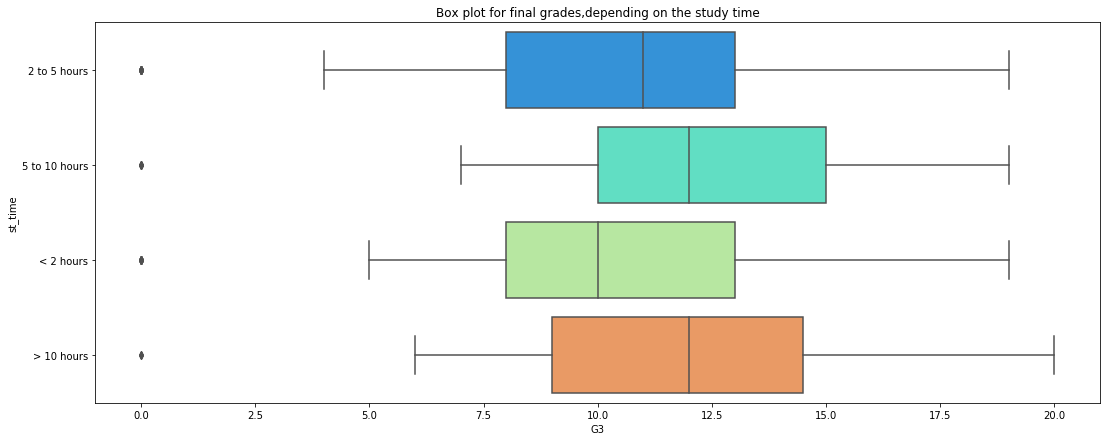

In [10]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="st_time", x="G3", data = data , orient="h", palette = 'rainbow')

- 每周学习时间少于两个小时的学生表现出最低的平均成绩。 当然！ 我是一名学生，可以说这还不够。 特别是在数学方面。
- 很少有学生每周花费超过10个小时学习。 但是它们显示出好的结果。 有时候我们都很懒。 但是我们必须设法找时间学习，好成绩才能稳定。

**学生居住地**
- 城市或乡村
- 生活在城市中的学生更容易饮酒或忙于上学。
- 住在乡村的学生可能太懒惰而无法上学和错过课程。
- 同时显示学生在上学路上所花费的时间（1-非常近，4-非常远）。

Text(0.5, 1, 'Students address: U - urban, R - rural')

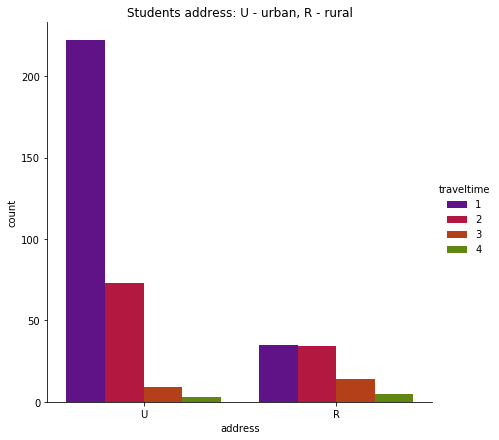

In [11]:
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=data, height = 6)
plt.title("Students address: U - urban, R - rural")

- 大多数学生住在城市。
- 很少有学生花很长时间去上学。
- 但是，**让我们看看上学的时长是否会影响缺勤人数**

Text(0.5, 1.0, 'Distribution of absences for students who live in village')

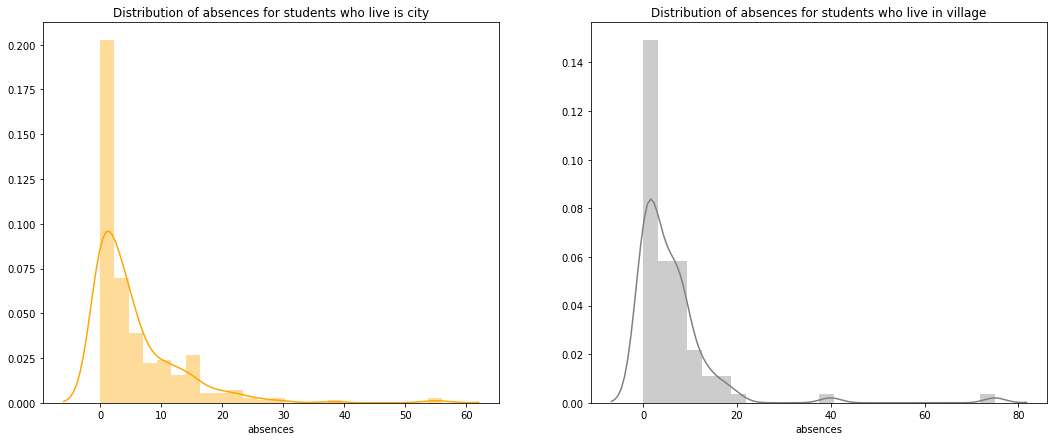

In [12]:
f= plt.figure(figsize=(18,7))

ax=f.add_subplot(121)
sns.distplot(data[(data.address == 'U')]["absences"],color='orange',ax=ax)
ax.set_title('Distribution of absences for students who live is city')

ax=f.add_subplot(122)
sns.distplot(data[(data.address == 'R')]['absences'],color='gray',ax=ax)
ax.set_title('Distribution of absences for students who live in village')

- 住在乡村的学生当中，相比于生活在城市中的学生，有更多学生缺席。
- 我们不能肯定地说这是由于学生不在城市居住这一事实，这可能是由于道路上的交通拥堵或交通安排不佳。

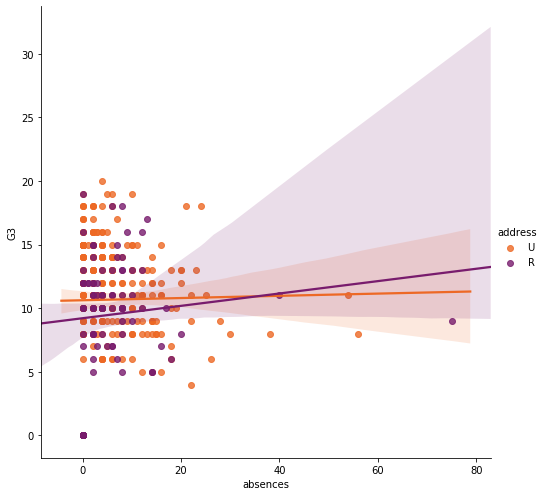

In [13]:
sns.lmplot(x="absences", y="G3",hue = 'address',data=data, palette = 'inferno_r', size = 7)

**更详细地研究学生的缺勤情况**
- 我们有关于学生恋爱关系的信息：是否存在恋爱关系。
- 考虑到学生的年龄，我们可以假设他们这个年龄段正适合恋爱。

**让我们看看爱情和关系的存在是否会影响缺席的次数**

Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

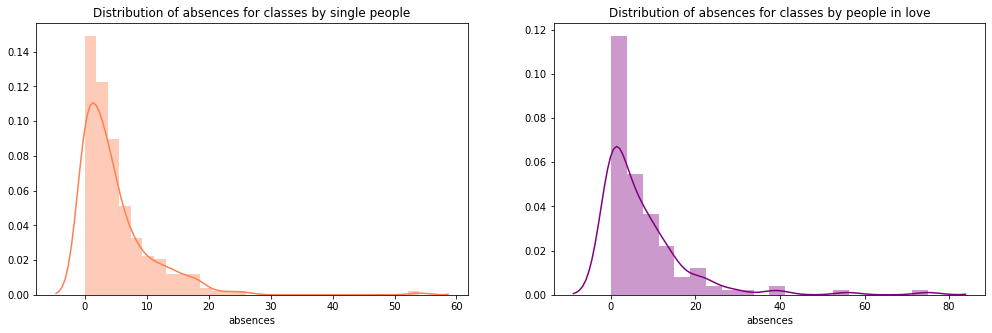

In [14]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["absences"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')

- 恋人没有注意到时钟
- 但是，我们怎么能因为恋爱而对青少年生气呢？
- **让我们看看这是否影响最终成绩。**

Text(0.5, 1.0, 'Distribution of grades in people in love')

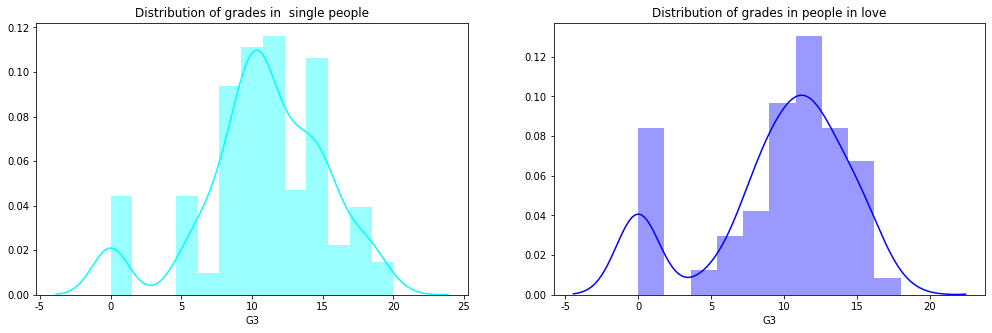

In [15]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades in  single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of grades in people in love')

- 单身学生的最终成绩比恋爱中的学生略高。当然，这可能是因为恋爱中的青少年相比于需要在数学教科书上花费的时间和精力没有与女友或男朋友在一起花费的时间和精力多。
- **让我们计算一下单身学生和有恋爱关系的学生的数量。**

Text(0.5, 1, 'How many students are in a romantic relationship?')

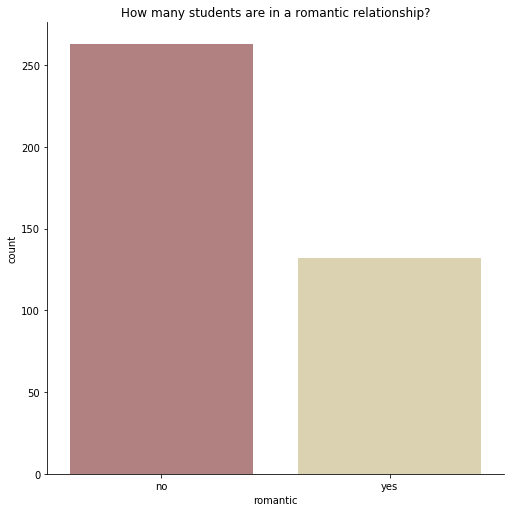

In [16]:
sns.catplot(x="romantic", kind="count",palette="pink", data=data, height = 7)
plt.title("How many students are in a romantic relationship?")

- 果然还是单身狗多（来自单身二十年的小男孩的微笑=:）

**学生健康**

In [17]:
labels = data["health"].unique().tolist()
amount = data["health"].value_counts().tolist()

colors = ["coral","lightgreen","pink","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Current health status (numeric: from 1 - very bad to 5 - very good)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'h_chart')

**学生的健康状况是否会影响最终成绩和通过次数。**

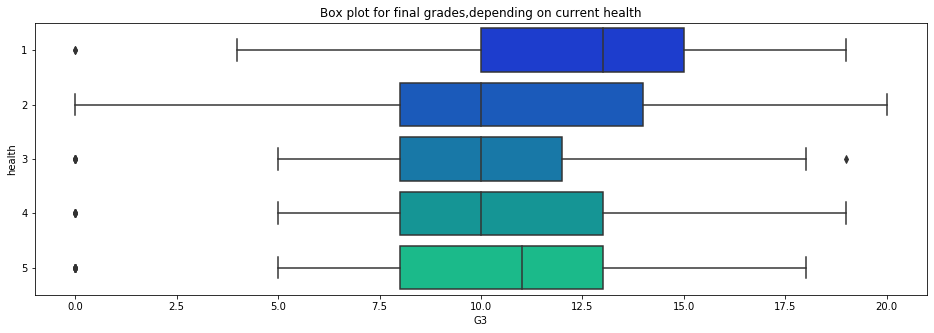

In [18]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on current health")
sns.boxplot(y="health", x="G3", data = data , orient="h", palette = 'winter')

- 这个结果很amazing!
- 大多数成绩好的学生身体健康程度都不怎么好，我希望他们不仅考虑他们在学校的成功，而且也考虑健康！（来自中年大叔的忠告=:） 


**接下来是旷工与身体状况情况分析**

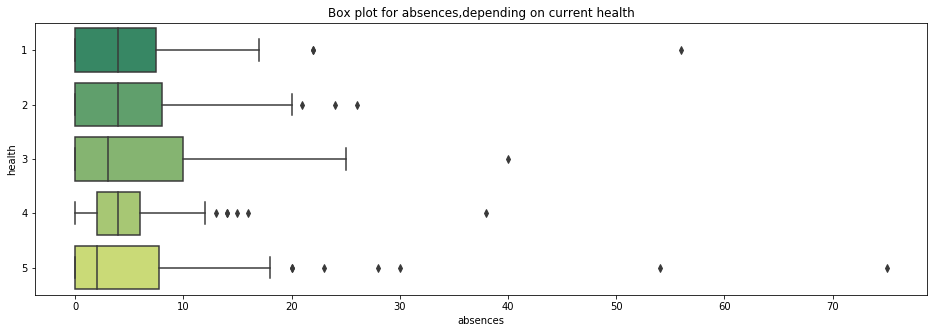

In [19]:
plt.figure(figsize=(16,5))
plt.title("Box plot for absences,depending on current health")
sns.boxplot(y="health", x="absences", data = data , orient="h", palette = 'summer')

- 学生的健康水平与缺课的次数之间没有明显的联系。
- 既然我们在谈论健康，就会更看重学生的**饮酒量**关系数据。

我重新定义每周的酒精消耗量= Dalc（工作日的饮酒量） + Walc（周末的饮酒量）
我将把工作日的饮酒量与周末的饮酒量结合起来。

In [20]:
data['Dalc'] = data['Dalc'] + data['Walc']

**每周饮酒**
* 学生每周至少喝酒两次，其中饮酒两次的人是最多的，往后依次递减。
* 这里显示了一周内喝酒0~10次的学生数

Text(0.5, 0, 'Weekly alcohol consumption')

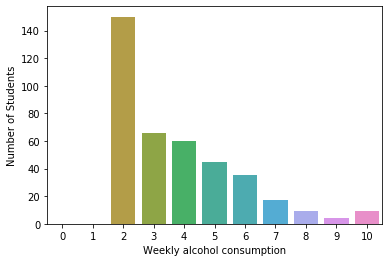

In [21]:
L = [len(data[data.Dalc == i])for i in range(11) ]
ax = sns.barplot(x = list(range(11)), y = L)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

In [22]:
labels = data["Dalc"].unique().tolist()
amount = data["Dalc"].value_counts().tolist()

colors = ["pink","lightgreen","white","cyan","gray"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'rt')

- 采样数据中的所有学生都一周内至少喝2次酒
- 再来看看喝酒与缺勤之间是否有关系

Text(0.5, 1.0, 'Distribution of absences for people who consume little alcohol on weekdays')

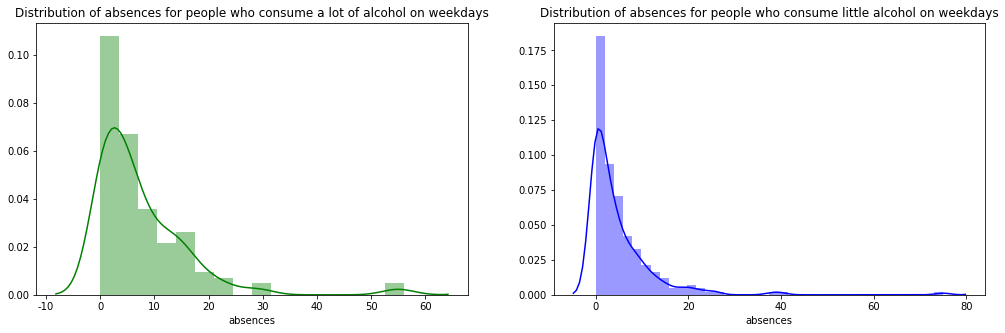

In [23]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc >= 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of absences for people who consume a lot of alcohol on weekdays')

ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc <= 3)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of absences for people who consume little alcohol on weekdays')

- 一周喝酒量如果太大，缺勤率还是蛮高的

**一天学习时长的学生分布情况**

Text(0.5, 0, 'Daily studytime consumption')

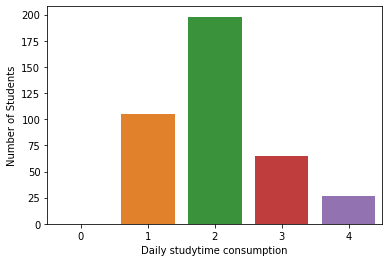

In [24]:
L = [len(data[data.studytime == i])for i in range(5) ]
ax = sns.barplot(x = list(range(5)), y = L)
plt.ylabel('Number of Students')
plt.xlabel('Daily studytime consumption')

avg:  2.0354430379746837


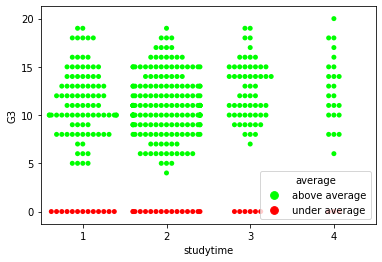

In [25]:
ave = sum(data.studytime)/float(len(data))
print('avg: ',ave)
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.swarmplot(x='studytime', y = 'G3', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('studytime_dalc.png')

- 一天内的学习时长在2的人数最多

Text(0.5, 0, 'Students studytime distribution according to weekly alcohol consumption')

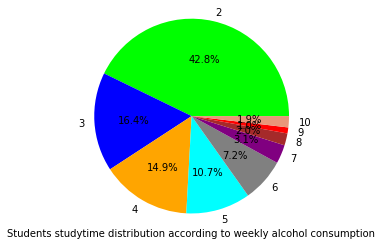

In [26]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = [sum(data[data.Dalc == i].studytime) for i in range(2,11)]
total_grade = sum(sizes)
average = total_grade/float(len(data))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.xlabel('Students studytime distribution according to weekly alcohol consumption')

- 从上图中看起来一个星期内喝两次酒的学生比其他人喝酒次数更多的学生的总的学习时间更长。
- 但是，实际上不能从该图中理解，因为一周内饮酒两次的学生人数比其他人多2倍
- 因此，让我们看一下群体图和平均饼状图以了解酒精是否影响学习时长。

Text(0.5, 0, 'Students average studytime distribution according to weekly alcohol consumption')

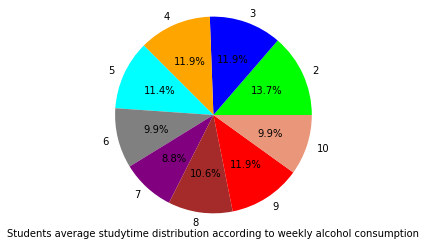

In [27]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
average = [sum(data[data.Dalc == i].studytime)/len(data[data.Dalc == i].G3) for i in range(2,11)]
total_grade = sum(sizes)
plt.pie(average,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.xlabel('Students average studytime distribution according to weekly alcohol consumption')

- 平均饮酒量在一周两次的学生相比于其他学生来说，学习时长更长一点

**根据学生饮酒量的期末考试成绩**
* 我根据每周酒精消耗量在2到10之间的同学与他们的G3成绩的关系数据进行可视化

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

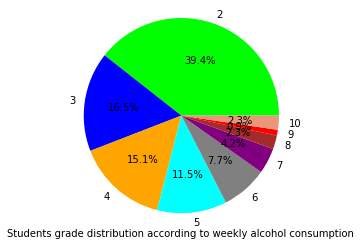

In [28]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = [sum(data[data.Dalc == i].G3) for i in range(2,11)]
total_grade = sum(sizes)
average = total_grade/float(len(data))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

- 从上图中看起来一个星期内喝两次酒的学生比其他人喝酒次数更多的学生的总分更高。
- 但是，实际上不能从该图中理解，因为一周内饮酒两次的学生人数比其他人多2倍
- 因此，让我们看一下群体图以了解酒精是否影响成绩。

**根据酒精饮料的平均成绩为学生评分**
* 期末考试平均成绩为10.415189873417722
* 为了了解饮酒是否会影响学生的成绩，我将所有以一周饮酒量分组的学生的成绩与平均成绩进行了比较。

avg:  10.415189873417722


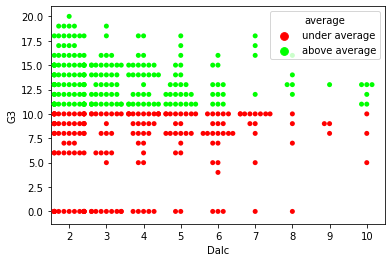

In [29]:
ave = sum(data.G3)/float(len(data))
print('avg: ',ave)
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekdays')

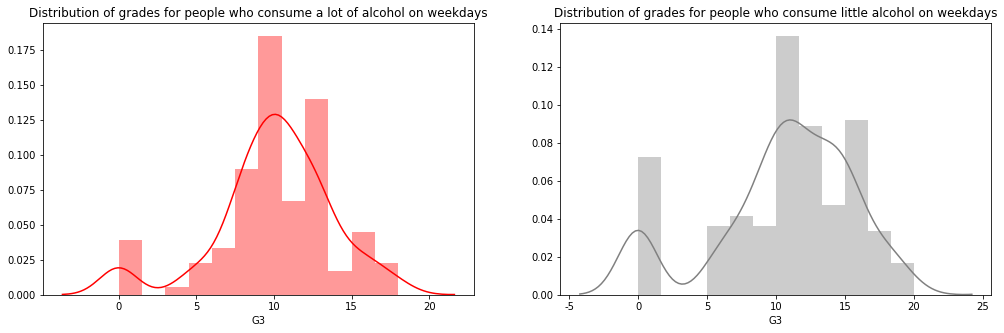

In [30]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc >= 5)]["G3"],color='red',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays')

ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc <= 3)]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays')

从上图中可以看出，成绩最高的学生一周仅饮酒两次。

In [31]:
sum(data[data.Dalc == 2].G3)/float(len(data[data.Dalc == 2]))

10.806666666666667

**我再查看一周饮酒量的次数与G3分数的平均值之间的关系**
- 分别查看柱状图和饼状图分布情况

Text(0.5, 0, 'Weekly alcohol consumption')

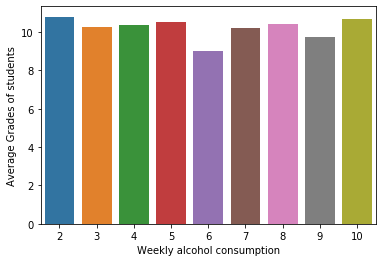

In [32]:
# 平均分数
list = [sum(data[data.Dalc == i].G3)/float(len(data[data.Dalc == i])) for i in range(2,11)]
ax = sns.barplot(x = [2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Average Grades of students')
plt.xlabel('Weekly alcohol consumption')

Text(0.5, 0, 'Students average grade distribution according to weekly alcohol consumption')

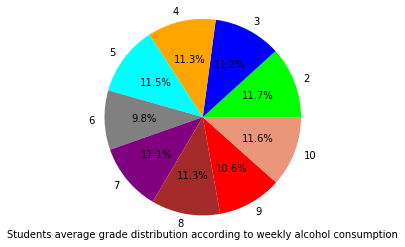

In [33]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
average = [sum(data[data.Dalc == i].G3)/len(data[data.Dalc == i].G3) for i in range(2,11)]
total_grade = sum(sizes)
plt.pie(average,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.xlabel('Students average grade distribution according to weekly alcohol consumption')

在这个happy的笔记上，还有一个更重要的feature-**学生参加的其他付费课程**。 如果学生想多学一点，并且父母有机会支付课程费用，那就很好了。 这不仅可以告诉我们有关学生的承诺，还可以告诉我们家庭的社会和经济地位。就我个人而言，我小时候还不明白，不仅要上学，而且要靠自己参与，这有多么重要。 让我们拭目以待吧哈哈哈

Text(0.5, 1, 'Distribution of final grades and age for students who have additional paid classes')

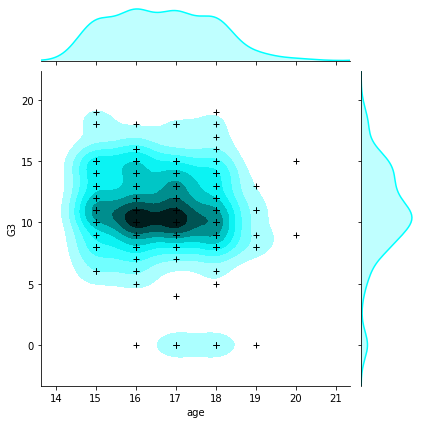

In [34]:
g = sns.jointplot(x="age", y="G3", data = data[(data.paid == 'yes')],kind="kde", color="cyan")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("age", "G3")
ax.set_title('Distribution of final grades and age for students who have additional paid classes')

Text(0.5, 1, 'Distribution of final grades and age for students who do not have additional paid classes')

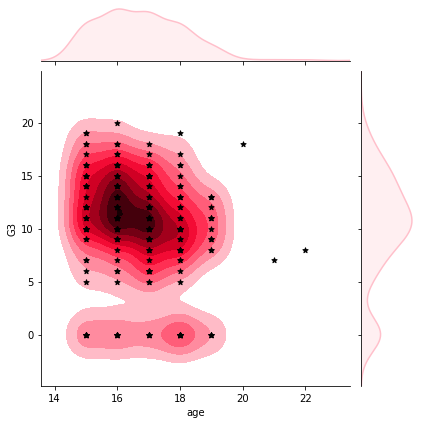

In [47]:
g = sns.jointplot(x="age", y="G3", data = data[(data.paid == 'no')],kind="kde", color="pink")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("age", "G3")
ax.set_title('Distribution of final grades and age for students who do not have additional paid classes')

Text(0.5, 1.0, 'Distribution of grades for students who do not have additional paid classes')

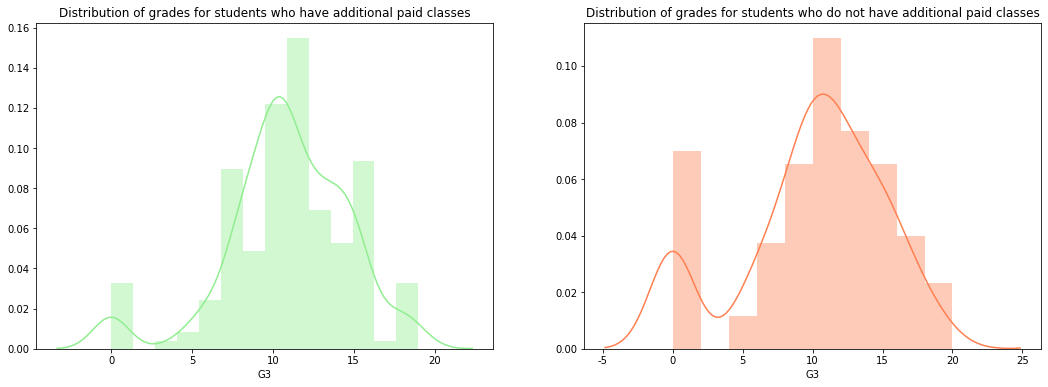

In [36]:
f= plt.figure(figsize=(18,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.paid == 'yes')]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for students who have additional paid classes')

ax=f.add_subplot(122)
sns.distplot(data[(data.paid == 'no')]['G3'],color='coral',ax=ax)
ax.set_title('Distribution of grades for students who do not have additional paid classes')

- 还有有关学生将来获得高等教育的愿望的数据。 这也是非常useful的信息！
- 那么issure来了，接受高等教育的愿望会affect最终成绩吗？

Text(0.5, 1, 'How many students want to ger higher education?')

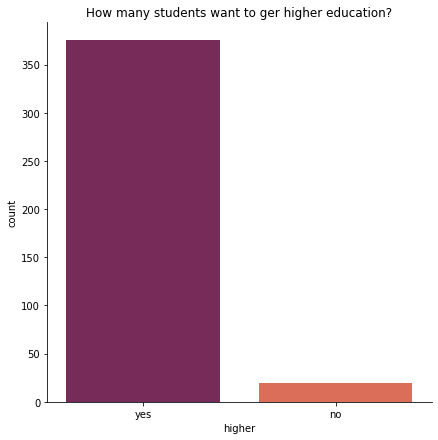

In [37]:
sns.catplot(x="higher", kind="count",palette="rocket", data=data, height = 6)
plt.title("How many students want to ger higher education?")

我am so happy that看到几乎all学生都希望接受高等教育。

Text(0.5, 1.0, 'Distribution of grades for students who does not want to get higher education')

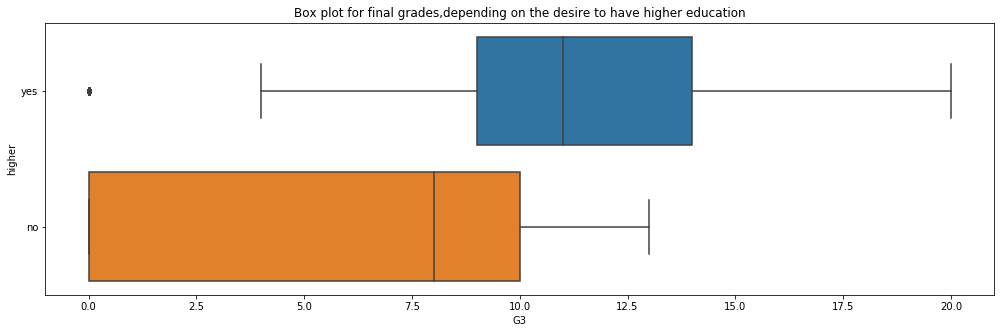

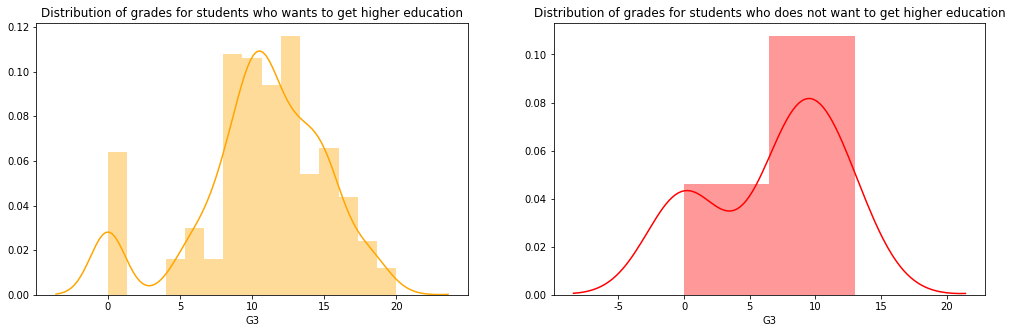

In [38]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the desire to have higher education")
sns.boxplot(y="higher", x="G3", data = data , orient="h", palette = 'tab10')

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.higher == 'yes')]["G3"],color='orange',ax=ax)
ax.set_title('Distribution of grades for students who wants to get higher education')

ax=f.add_subplot(122)
sns.distplot(data[(data.higher == 'no')]['G3'],color='red',ax=ax)
ax.set_title('Distribution of grades for students who does not want to get higher education')

- 渴望接受高等教育会刺激学生取得更高的成绩。


by the way, 我并没有忘记在学生家里注意**互联网**的存在。 
如今，Internet的重要性我就不repeat了

Text(0.5, 1, 'How many students have not Internet (yes/no)?')

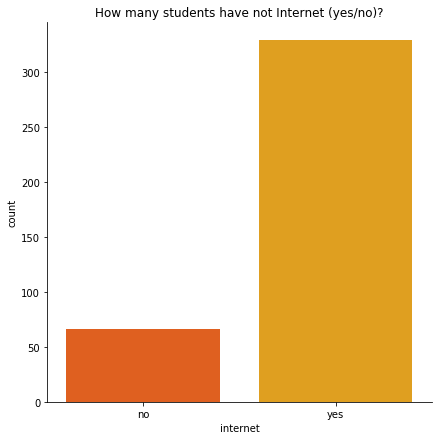

In [39]:
sns.catplot(x="internet", kind="count",palette="autumn", data=data, height = 6)
plt.title("How many students have not Internet (yes/no)?")

Firstly，让我们看一下互联网的可用性是否会影响学生的time speed on study。

In [40]:
time1 =data[(data.internet == 'no')].st_time.value_counts()
labels = (np.array(time1.index))
sizes = (np.array((time1 / time1.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students without access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time1")

In [41]:
time2 =data[(data.internet == 'yes')].st_time.value_counts()
labels = (np.array(time2.index))
sizes = (np.array((time2 / time2.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students with access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time2")

- 在上网之后，花费在学习的时间大于2小时的学生人数会减少
- 说明上网时间也会影响到学生学习的时长，但是效果关系不明显

- 最后我们要看的是**学生的家庭**。 
- 家庭在孩子的成长中起着非常重要的作用。 数据集为我们提供了有关学生家庭，职业和父母受教育程度等的大量信息。 
- 让我们从一个事实开始，我们查看学生家庭中的人数和父母的居住状况：**父母是否住在一起**

Text(0.5, 1, 'Number of people in the family: GT3 - more than 3, LE3 - less than 3, Pstatus(Parent Status): A - Living apart, T - Living together')

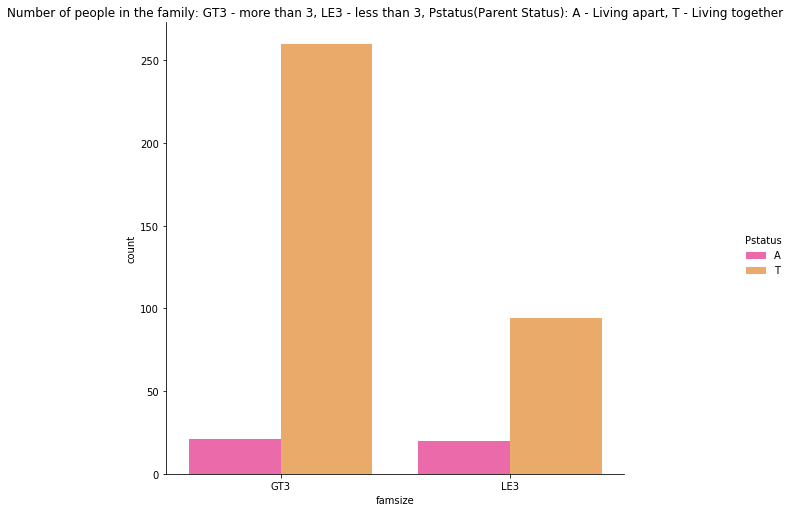

In [42]:
sns.catplot(x="famsize", kind="count",hue = "Pstatus",palette="spring", data=data, height = 7)
plt.title("Number of people in the family: GT3 - more than 3, LE3 - less than 3, Pstatus(Parent Status): A - Living apart, T - Living together")

- 结果显示，我很高兴大多数学生和父母一起生活。 而且很多人都是一家人多余3人，其乐融融，共享天伦
- 有很多有关学生家长的信息。主要是**家长的职业信息**，比如，其中有多少是医生，家庭主妇等等。

In [43]:
labels = data["Mjob"].unique().tolist()
amount = data["Mjob"].value_counts().tolist()

colors = ["orange", "green", "yellow", "white",'cyan']

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Mother's job")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pi_chart')

In [44]:
labels = data["Fjob"].unique().tolist()
amount = data["Fjob"].value_counts().tolist()

colors = ["coral","lightgreen","gray","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Father's job")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pg_chart')

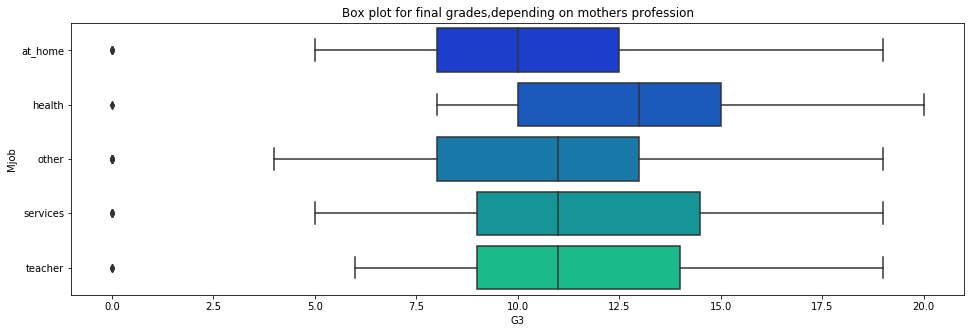

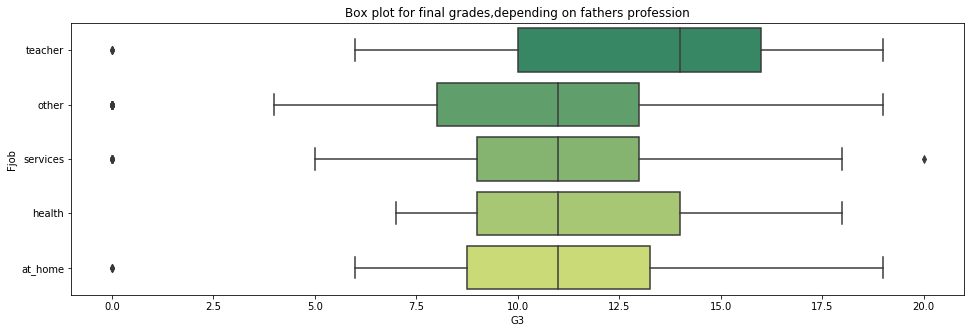

In [45]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on mothers profession")
sns.boxplot(y="Mjob", x="G3", data = data , orient="h", palette = 'winter')

plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on fathers profession")
sns.boxplot(y="Fjob", x="G3", data = data , orient="h", palette = 'summer')

- 看起来，从事医学工作的母亲向孩子instill了许多对学习的热爱。（有人不喜欢学习吗？废话……）
- 最后一点是family relationships的质量

In [46]:
labels = data["famrel"].unique().tolist()
amount = data["famrel"].value_counts().tolist()

colors = ["pink","cyan","coral","orange","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Quality of family relationships(numeric: from 1 - very bad to 5 - excellent)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pf_chart')

- 结果显示，家庭质量比较好的家庭还是挺多的，非常不错

- 有优秀成绩的秘诀吗？ of course, 
- 给足够的时间学习
- 不要只顾着谈恋爱，谈恋爱的同学在学习时长上花费的少一些
- 家庭关系要相处的好，父母在家一起陪孩子学习会更好
- 不要滥用酒精，酒精使用过度会降低学习的欲望，减少学习的时间，成绩也会受影响
- 上网时间要学会控制
- 学习好之外，身体也要healthy
- 学习不好的话，缺勤率也会高，所以减少缺勤哦
- 城市的学生学习时长更长，学习成绩相对于乡村中的学生要好一些，在路上花费的时间会更短
- 有一个很好地接受高等教育的心愿的同学学习动力更大